In [1]:
from torchvision import datasets, transforms

transform = transforms.ToTensor()
train_data = datasets.FashionMNIST(root='../data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='../data', train=False, download=True, transform=transform)

Training set size: 60000
Test set size: 10000
Number of classes: 10
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Image shape: torch.Size([1, 28, 28])


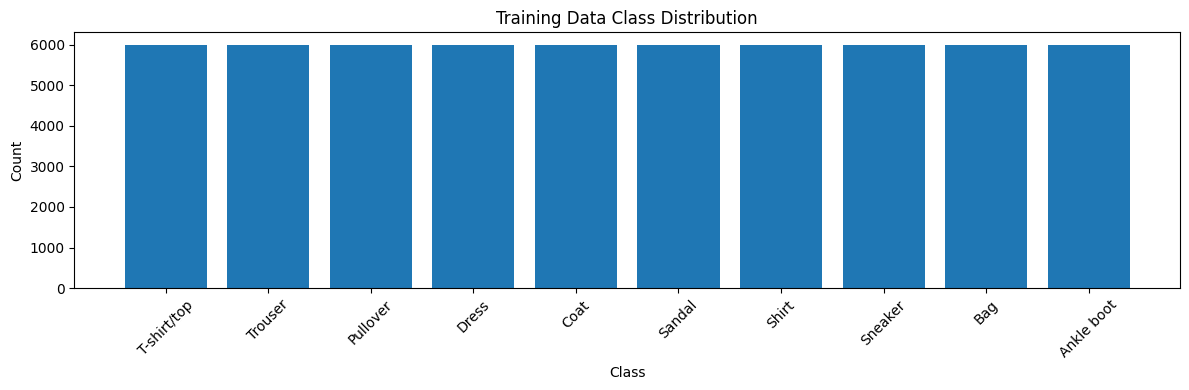

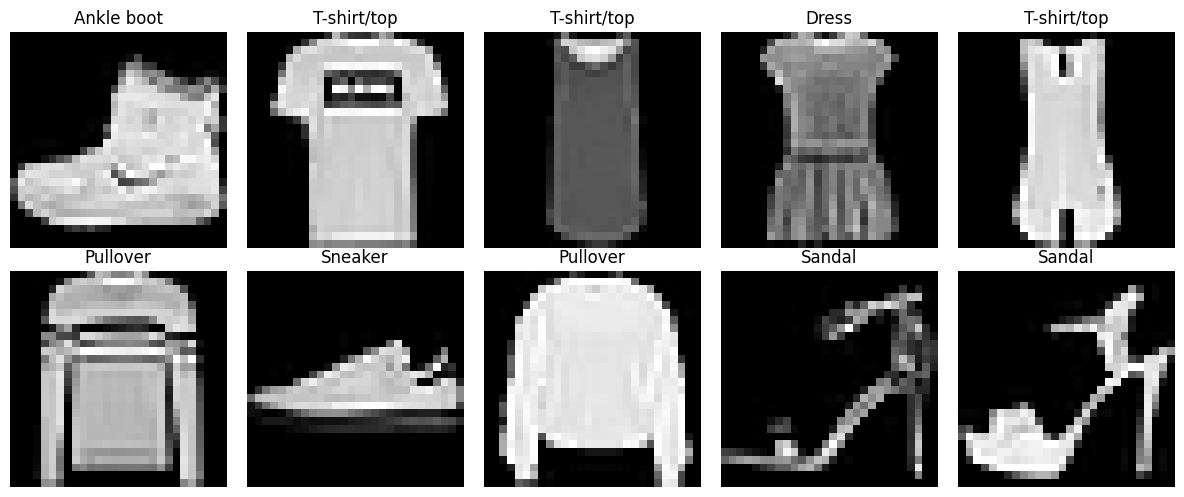

In [2]:
import numpy as np

import matplotlib.pyplot as plt

# Class labels for FashionMNIST
class_names = train_data.classes

# Dataset statistics
print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")
print(f"Number of classes: {len(class_names)}")
print(f"Class names: {class_names}")
print(f"Image shape: {train_data[0][0].shape}")

# Class distribution
train_labels = [label for _, label in train_data]
unique, counts = np.unique(train_labels, return_counts=True)
plt.figure(figsize=(12, 4))
plt.bar([class_names[i] for i in unique], counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Training Data Class Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    image, label = train_data[i]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(class_names[label])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import torch
from torch.utils.data import DataLoader
import sys
sys.path.append('../src')
import model
import train
import torch.nn as nn

test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Create validation set (10% of training data)
val_size = int(0.1 * len(train_data))
train_size = len(train_data) - val_size
train_data, val_data = torch.utils.data.random_split(train_data, [train_size, val_size])
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

model = model.FashionClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

device = None
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available(): # For Apple Silicon GPUs
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

train.train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10, device=device)
train.evaluate_model(model, test_loader, device=device)

Using device: mps
Epoch [1/10] - Loss: 0.2048
Accuracy: 87.24%
Epoch [2/10] - Loss: 0.1708
Accuracy: 89.15%
Epoch [3/10] - Loss: 0.3628
Accuracy: 90.37%
Epoch [4/10] - Loss: 0.5289
Accuracy: 90.83%
Epoch [5/10] - Loss: 0.1638
Accuracy: 91.26%
Epoch [6/10] - Loss: 0.1069
Accuracy: 92.00%
Epoch [7/10] - Loss: 0.1107
Accuracy: 91.76%
Epoch [8/10] - Loss: 0.1300
Accuracy: 92.07%
Epoch [9/10] - Loss: 0.2508
Accuracy: 92.26%
Epoch [10/10] - Loss: 0.0951
Accuracy: 91.98%
Accuracy: 91.29%


91.29